In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split #train test package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [2]:
df=pd.read_csv("C:/Users/jpadmanabhan/Downloads/train_titanic.csv")
df2=pd.read_csv("C:/Users/jpadmanabhan/Downloads/test_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

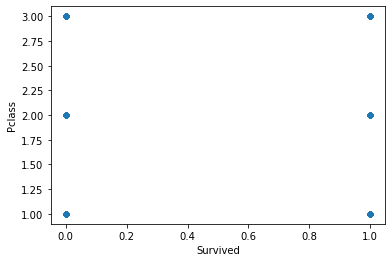

In [4]:
df.plot(x='Survived', y='Pclass', kind='scatter')

In [5]:
df.drop(["Cabin", "Name", "SibSp","Ticket","Parch","PassengerId"],axis = 1, inplace=True)
#df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Cabin"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [8]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [9]:
#df.Cabin.unique()
#df['Cabin'] = df['Cabin'].str.replace('[^0-9]', '', regex=False).astype('int64')
#df['Cabin'] = df['Cabin'].astype('float')
#df['Cabin'] = df['Cabin'].astype(int)


#for dt in df:
#    df['Cabin'] = df['Cabin'].str[:1]
#df['Cabin'].fillna((df['Cabin'].ffill()) , inplace=True)
#df['Cabin'].fillna((df['Cabin'].bfill()) , inplace=True)

#df['Cabin'] = df['Cabin'].str.replace(r'\D', '', regex=False)
#df['Cabin'] = df['Cabin'].str.replace(r'[^0-9]', '', regex=False)
#df['Cabin'] = df['Cabin'].astype(int)

#df.Cabin.unique()
#df = df.replace(to_replace = ['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'],value = ['2', '3', '4', '5', '6', '7', '8', '9'])

In [10]:
#emb = df['Embarked']
#df2 =pd.get_dummies(df['Embarked'])
lb = LabelEncoder() 
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
#df=pd.get_dummies(df, columns = ['Embarked'])
df = df.replace(to_replace = ['S','Q','C'],value = ['0','1','2'])
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,0
1,1,1,female,38.0,71.2833,2
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,1
886,0,2,male,27.0,13.0000,0
887,1,1,female,19.0,30.0000,0
889,1,1,male,26.0,30.0000,2


In [12]:
df.Sex.unique() #find categories of column

array(['male', 'female'], dtype=object)

In [13]:
#df['Sex'].replace(1, 'male',inplace=True)
#df['Sex'].replace(0, 'female',inplace=True)


df['Sex'] = lb.fit_transform(df['Sex']) #LABEL ENCODING

#df = df.replace(to_replace = ['female','male'],value = ['1','0']) THIS WORKS TOO
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,0
4,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,1
886,0,2,1,27.0,13.0000,0
887,1,1,0,19.0,30.0000,0
889,1,1,1,26.0,30.0000,2


In [14]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
df['Embarked'] = df['Embarked'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22,7,0
1,1,1,0,38,71,2
2,1,3,0,26,7,0
3,1,1,0,35,53,0
4,0,3,1,35,8,0


In [15]:
x = df.drop('Survived', axis=1)
x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,0
1,1,0,38,71,2
2,3,0,26,7,0
3,1,0,35,53,0
4,3,1,35,8,0


In [16]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
636,3,1,32,7,0
662,1,1,47,25,0
480,3,1,9,46,0
187,1,1,45,26,0
217,2,1,42,27,0


In [18]:
modelLR = LogisticRegression(max_iter=30000)
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=30000)

In [19]:
y_predictLR = modelLR.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictLR)
accuracy

0.7692307692307693

In [20]:
modelDT = DecisionTreeClassifier() #NOT THE BEST
modelDT.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_predictDT = modelDT.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictDT)
accuracy

0.7762237762237763

In [22]:
modelKNN = KNeighborsClassifier(n_neighbors=1) #LESS THAN DT AND LR
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_predictKNN = modelKNN.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictKNN)
accuracy

0.7062937062937062

In [24]:
modelRCF = RandomForestClassifier() #MORE THAN DT, LR AND KNN
modelRCF.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
y_predictRCF = modelRCF.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictRCF)
accuracy

0.7832167832167832

In [26]:
modelSVM = SVC(kernel='poly') #kernel = poly, kernel = rbf; accuracy changes for each kernel
modelSVM.fit(x_train, y_train) #LESS THAN ALL

SVC(kernel='poly')

In [27]:
y_predictSVM = modelSVM.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictSVM)
accuracy

0.5874125874125874

In [28]:
modelGNB = GaussianNB() #MORE THAN DT, LR AND KNN
modelGNB.fit(x_train, y_train)

GaussianNB()

In [29]:
y_predictGNB = modelGNB.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictGNB)
accuracy

0.7762237762237763

In [30]:
my_model = xgb.XGBClassifier(learning_rate=0.30009999, max_depth=5) #HIGHEST
my_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.30009999, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
y_predictxgb = my_model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictxgb)
accuracy

0.8041958041958042